# Introduction

This notebook aims to develop a multi class classifier for Fashion MNIST Dataset using Deep Learnnig libraries like Keras and Tensorflow. I have used the idea of **Convolution Neural Network** in this notebbook.

Following is the Hyperparameters values that I have used in this notebook:  

- Learning Rate - 0.0001
- Batch Size - 32
- Epochs - 30
- Optimizer - Adam
- Loss Function - Sparse Categorical Cross Entropy
- Activation Function - Relu and Softmax

I have got **93.75% Test Accuracy and 93.75% F1-score without using Transfer Learning**. The reason I haven't used Transfer Learning is because I was curious to develop my own model.

# Import Modules

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.datasets.fashion_mnist import load_data
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import plot_model
from sklearn.metrics import classification_report, confusion_matrix, f1_score

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Load Datasets

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print('X_train_full shape:', X_train_full.shape)
print('y_train_full shape:', y_train_full.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train_full shape: (60000, 28, 28)
y_train_full shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


# Data Preprocessing

Our dataset is almost processed, I have just scaled down the image pixel range from `0-255` to `0-1`. I have selected top 55k images as train data and last 5k images as validation data.  

In [5]:
X_train, X_valid = X_train_full[:-5000] / 255., X_train_full[-5000:] / 255.
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test / 255.

In [6]:
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [7]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_valid shape:', X_valid.shape)
print('y_valid shape:', y_valid.shape)

X_train shape: (55000, 28, 28, 1)
y_train shape: (55000,)
X_valid shape: (5000, 28, 28, 1)
y_valid shape: (5000,)


In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Data Visualization

Ankle boot


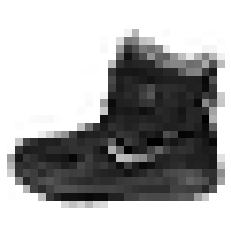

In [9]:
print(class_names[y_train[0]])
plt.imshow(X_train[0].squeeze(), cmap='binary')
plt.axis('off')
plt.show()

Let's have a look at the top 100 images and their labels from the train datasets.

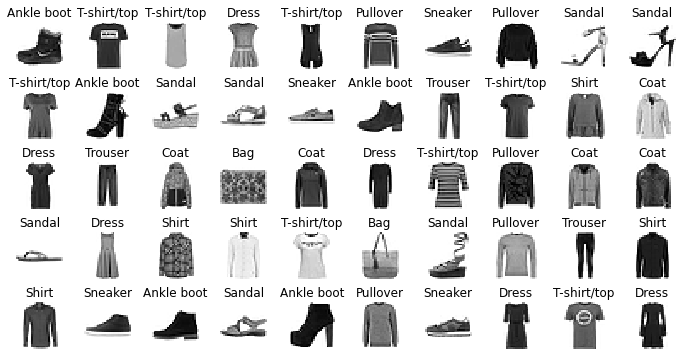

In [10]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index].squeeze(), cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Model Building

This is one of the most controversial and research topic. I have used `Conv2D`, `MaxPooling2D`, `Dropout`, `BatchNormalization`, `Flatten` and `Dense` layers.  I have used `sparse_categorical_crossentropy`  as our class labels in the range of `0-9`. If your clas labels are one-hot-encoded, use `categorical_crossentropy` as a loss function.  

I have tried lot of different combinations of different layers and found this as one of the good choice. You may disagree to me on this.   

I have found [this](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) as one of the really good question on stackoverflow which might help you in building your CNN model. 

In [11]:
EPOCHS = 30
BATCH_SIZE = 32
LEARNING_RATE = 0.0001

In [12]:
def FashionNet(input_shape=(28, 28, 1)):

    input = Input(shape=input_shape)

    layer1 = Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu')(input)

    layer2 = Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu')(layer1)
    layer2 = MaxPooling2D(pool_size=2)(layer2)
    layer2 = Dropout(0.2)(layer2)
    layer2 = BatchNormalization()(layer2)

    layer3 = Conv2D(128, 3, activation='relu', padding='SAME')(layer2)

    layer4 = Conv2D(128, 3, padding='SAME', activation='relu')(layer3)
    layer4 = MaxPooling2D(pool_size=2)(layer4)
    layer4 = Dropout(0.2)(layer4)
    layer4 = BatchNormalization()(layer4)

    layer5 = Conv2D(256, 3, activation='relu', padding='SAME')(layer4)
    layer5 = MaxPooling2D(2)(layer5)
    layer5 = Dropout(0.2)(layer5)
    layer5 = BatchNormalization()(layer5)

    layer6 = Flatten()(layer5)

    layer7 = Dense(1024, activation='relu')(layer6)
    layer7 = Dropout(0.4)(layer7)

    layer8 = Dense(512, activation='relu')(layer7)
    
    output = Dense(10, activation='softmax')(layer8)

    fashion_model = Model(inputs=input, outputs=output)

    fashion_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    fashion_model.summary()

    return fashion_model

In [13]:
fashion_net = FashionNet()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856 

# Model Training

In [14]:
history = fashion_net.fit(X_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS, 
                validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 6ms/step - loss: 0.6582 - accuracy: 0.7651 - val_loss: 0.2729 - val_accuracy: 0.8938
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3206 - accuracy: 0.8832 - val_loss: 0.3325 - val_accuracy: 0.8708
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2740 - accuracy: 0.9005 - val_loss: 0.2511 - val_accuracy: 0.9086
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2462 - accuracy: 0.9099 - val_loss: 0.2336 - val_accuracy: 0.9148
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2373 - accuracy: 0.9149 - val_loss: 0.2290 - val_accuracy: 0.9192
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2155 - accuracy: 0.9215 - val_loss: 0.2251 - val_accuracy: 0.9220
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1928 - accuracy: 0.9293 - val_loss: 0.2883 - val_ac

# Prediction using a Model

In [15]:
predictions = fashion_net.predict(X_test)

In [16]:
y_pred = np.argmax(predictions, axis=1)

In [17]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [18]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Lets create a dataframe of Model Prediction and Actual Labels of any 10 samples from the test set and compare the results.

In [19]:
part_predictions = []
part_actual_labels = []
for i, j in zip(y_pred[1000:1010], y_test[1000:1010]):
    part_predictions.append(class_names[i])
    part_actual_labels.append(class_names[j])

In [20]:
partial_data = {'Predictions' : part_predictions, 'Actual Labels' : part_actual_labels}
part_predict = pd.DataFrame(partial_data)
part_predict

Predictions Actual Labels
0       Shirt   T-shirt/top
1       Dress         Dress
2      Sandal        Sandal
3      Sandal        Sandal
4       Shirt         Shirt
5       Shirt   T-shirt/top
6      Sandal        Sandal
7  Ankle boot    Ankle boot
8       Shirt         Shirt
9       Dress         Dress

As you can observe from the above partial prediction dataframe that our model has misclassified the `T-shirt/top` as `Shirt` 2 out of the 2 times. It is pretty understandable as Shirt and T-shirt looks almost similar.  

It might happen that our model would give less precision on class `Shirt` as our model has misclassified the `T-shirt/top` as `Shirt` and less recall on class `T-shirt/top` as none of the `T-shirt/top` has classified correctly.  

If you are having confusion in Precision and Recall, let me clarify it:
- Consider a binary classification scenario where there are two classes namely `Shirt` and `T-shirt/top (Not Shirt)`.  
    - Precision
        - **Of all images where we predicted `Shirt`, what fraction of images are of shirt actually.**
        - True Positive / Total Predicted Positive = True Positive / (True Positive + False Positive)
    - Recall
        - **Of all actual images of `Shirt`, what fraction of images we correctly detect as `Shirt`.**  
        - True Positive / Total Actual Positive = True Positive / (True Positive + False Negative)

Lets pick any 5 random sample from the test set, plot them with Model Prediction and Actual Labels. 

In [21]:
n_img = 5
start_idx = 100
X_new = X_test[start_idx: start_idx + n_img]

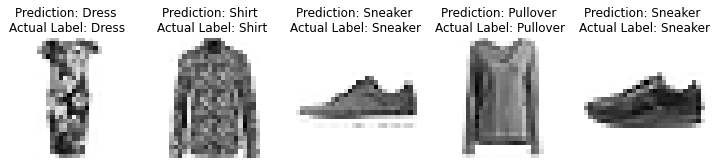

In [22]:
plt.figure(figsize=(2.5 * n_img, 2.4))
idx = 0
for index, image in enumerate(X_new, start=start_idx):
    plt.subplot(1, n_img, idx + 1)
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.title(f'Prediction: {class_names[y_pred[index]]} \nActual Label: {class_names[y_test[index]]}', fontsize=12)
    idx += 1
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# Model Evaluation

In [23]:
loss, accuracy = fashion_net.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2249 - accuracy: 0.9375


In [24]:
print(f'Loss: {round(loss, 2)}')
print(f'Accuracy: {round(accuracy * 100, 2)}%')

Loss: 0.22
Accuracy: 93.75%


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1000
           1       1.00      0.98      0.99      1000
           2       0.92      0.90      0.91      1000
           3       0.93      0.94      0.94      1000
           4       0.91      0.90      0.90      1000
           5       0.99      0.99      0.99      1000
           6       0.78      0.85      0.82      1000
           7       0.98      0.96      0.97      1000
           8       0.98      0.99      0.99      1000
           9       0.97      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



As I have discussed in one of the above cell about our model precision on `Shirt class or class 6`, you can see that our model has given 78% precision on `Shirt class or class 6` and 85% recall on `Shirt class or class 6` which are very low.     

**78% precision means that out of 100 images where we predicted `Shirt`, only 78 out of them are of `Shirt` actually.  
85% recall means that out of all `Shirt` images present in our datasets, our model has detected 85% of the `Shirt` images correctly.**

In [26]:
print(f'F1 score: {round(f1_score(y_test, y_pred, average="macro") * 100, 2)}%')

F1 score: 93.78%


## Loss/Accuracy vs Epochs Plot

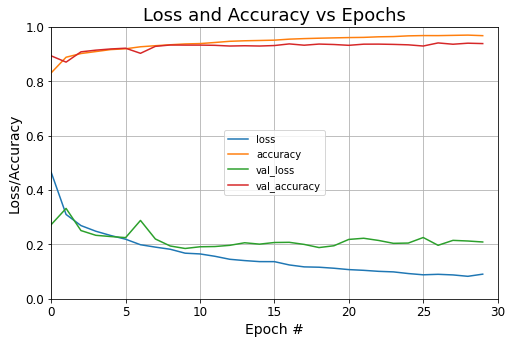

In [28]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, EPOCHS)
plt.title("Loss and Accuracy vs Epochs", fontsize=18)
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center")
plt.show()